In [7]:
import matplotlib.pyplot as plt
import numpy as np
from datasets import MaskedMNIST

In [3]:
data = MaskedMNIST(train=True)

0


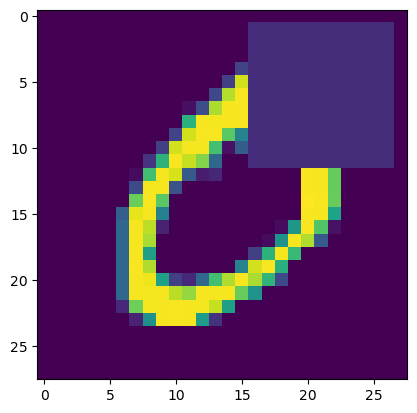

In [48]:
masked_image, image, label = data[1]
plt.imshow(masked_image[0].numpy())
print(label)